## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [17]:
# Your code here - remember to use markdown cells for comments as well!

Importing the neccessary files:

In [32]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np



Connecting to the database:

In [35]:
conn = sqlite3.connect('im.db 2')
cur = conn.cursor()


Importing movie gross file:

In [36]:
movie_gross = pd.read_csv('file:///Users/winniemukene/Downloads/bom.movie_gross.csv')
movie_gross


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [37]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Checking for null values:

In [38]:
movie_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

Dropping the null values:

In [39]:
movie_gross.dropna(inplace=True)

Dropping null values in the domestic gross_col:

Checking for duplicates:

In [40]:
movie_gross.duplicated().value_counts()

False    2007
dtype: int64

In [41]:
movie_gross.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

Converting movie_gross into sql table:

In [42]:
movie_gross.to_sql('movie_gross', conn, index=False, if_exists='replace')

In [43]:
q = """ SELECT * FROM movie_gross;"""
pd.read_sql(q, conn)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
2002,I Still See You,LGF,1400.0,1500000,2018
2003,The Catcher Was a Spy,IFC,725000.0,229000,2018
2004,Time Freak,Grindstone,10000.0,256000,2018
2005,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [44]:
#top 10 movies with the highest domestic gross

q = """ SELECT title, domestic_gross FROM movie_gross ORDER BY domestic_gross DESC; """
pd.read_sql(q, conn).head(10)

,title,domestic_gross
0,Star Wars: The Force Awakens,936700000.0
1,Black Panther,700100000.0
2,Avengers: Infinity War,678800000.0
3,Jurassic World,652300000.0
4,Marvel's The Avengers,623400000.0
5,Star Wars: The Last Jedi,620200000.0
6,Incredibles 2,608600000.0
7,Rogue One: A Star Wars Story,532200000.0
8,Beauty and the Beast (2017),504000000.0
9,Finding Dory,486300000.0


In [45]:
#top 10 movies with the highest domestic_gross + foreign_gross

q = """ SELECT title, domestic_gross + foreign_gross AS total_gross FROM movie_gross ORDER BY total_gross DESC; """
pd.read_sql(q, conn).head(10)

,title,total_gross
0,Marvel's The Avengers,1.518900e+09
1,Avengers: Age of Ultron,1.405400e+09
2,Black Panther,1.347000e+09
3,Harry Potter and the Deathly Hallows Part 2,1.341500e+09
4,Star Wars: The Last Jedi,1.332600e+09
5,Jurassic World: Fallen Kingdom,1.309500e+09
6,Frozen,1.276400e+09
7,Beauty and the Beast (2017),1.263500e+09
8,Incredibles 2,1.242800e+09
9,Iron Man 3,1.214800e+09


Plotting a histogram representing the title against total gross:

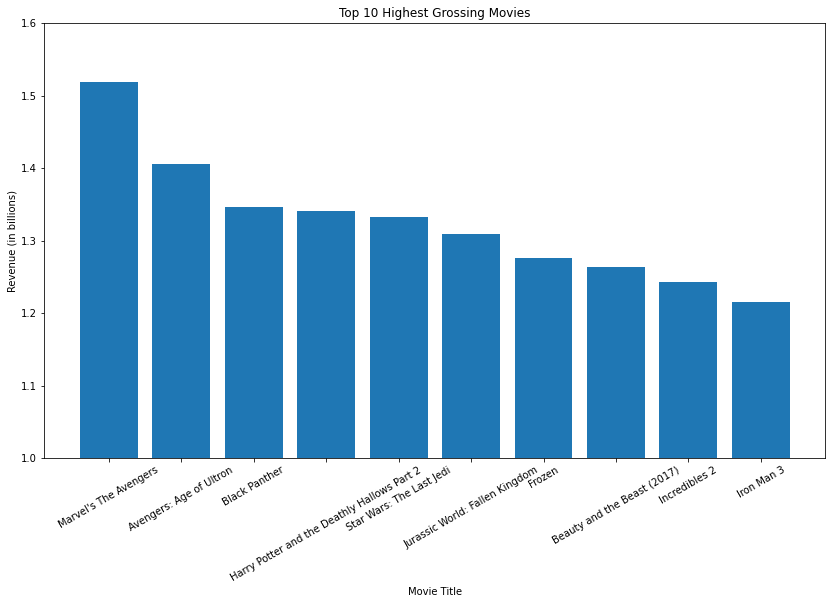

In [46]:

# create the data arrays
movies = ['Marvel\'s The Avengers', 'Avengers: Age of Ultron', 'Black Panther',
          'Harry Potter and the Deathly Hallows Part 2', 'Star Wars: The Last Jedi',
          'Jurassic World: Fallen Kingdom', 'Frozen', 'Beauty and the Beast (2017)',
          'Incredibles 2', 'Iron Man 3']
revenues = np.array([1.5189, 1.4054, 1.347, 1.3415, 1.3326, 1.3095, 1.2764, 1.2635, 1.2428, 1.2148])

# create a figure and axis object
fig, ax = plt.subplots()

# create the bar graph
ax.bar(movies, revenues)

# set the title and labels for the plot
ax.set_title('Top 10 Highest Grossing Movies')
ax.set_xlabel('Movie Title')
ax.set_ylabel('Revenue (in billions)')

# rotate the x-axis labels for better readability
plt.xticks(rotation=30)
ax.set_ylim([1.0, 1.6])
fig.set_size_inches(14, 8)

# display the plot
plt.show()


###### top 10  Highest grossing movies and their genres and production years:

Marvel's The Avengers (2012) - Action/Adventure/Sci-Fi
Avengers: Age of Ultron (2015) - Action/Adventure/Sci-Fi
Black Panther (2018) - Action/Adventure/Sci-Fi
Harry Potter and the Deathly Hallows Part 2 (2011) - Fantasy/Adventure
Star Wars: The Last Jedi (2017) - Action/Adventure/Sci-Fi
Jurassic World: Fallen Kingdom (2018) - Action/Adventure/Sci-Fi
Frozen (2013) - Animation/Fantasy/Musical
Beauty and the Beast (2017) - Fantasy/Musical/Romance
Incredibles 2 (2018) - Animation/Action/Adventure
Iron Man 3 (2013) - Action/Sci-Fi

Importing the movie_count file:

In [47]:
movie_count = pd.read_csv('file:///Users/winniemukene/Downloads/tmdb.movies.csv')
movie_count.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [48]:
#converting the data to sql table

movie_count.to_sql('movie_count', conn, if_exists='replace', index=False)


/Users/winniemukene/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/generic.py:2605: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [49]:
#checking for null values

movie_count.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [50]:
q = """ SELECT * FROM movie_count; """
pd.read_sql(q, conn)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [51]:
#top 10 movies with the highest vote count
q = """ SELECT title, vote_count, release_date FROM movie_count ORDER BY vote_count DESC; """
pd.read_sql(q, conn).head(10)

,title,vote_count,release_date
0,Inception,22186,2010-07-16
1,Deadpool,20175,2016-02-12
2,The Avengers,19673,2012-05-04
3,Avatar,18676,2009-12-18
4,Interstellar,18597,2014-11-05
5,Guardians of the Galaxy,17958,2014-08-01
6,Django Unchained,15725,2012-12-25
7,The Hunger Games,14587,2012-03-23
8,Mad Max: Fury Road,14454,2015-05-15
9,Iron Man 3,14155,2013-05-03


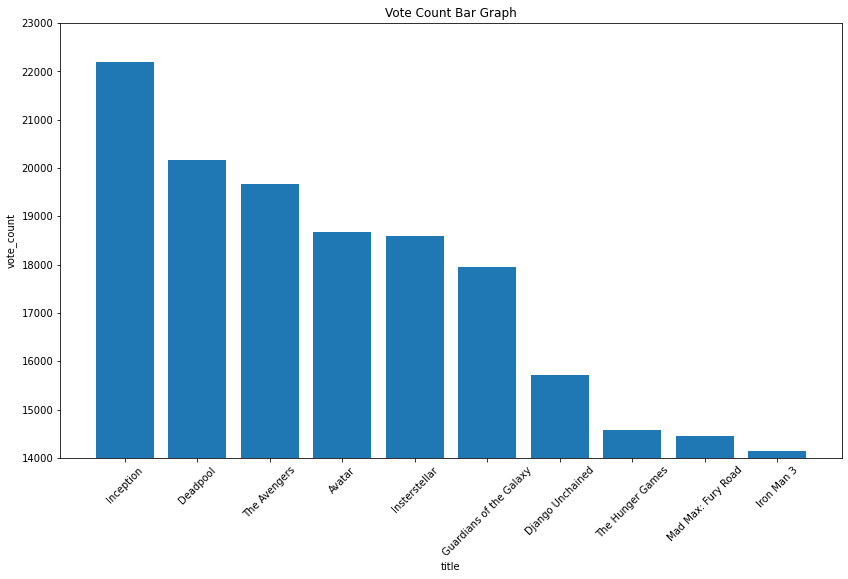

In [52]:

#plotting a a bar graph for the top 10 most voted for movies

title = np.array(['Inception', 'Deadpool', 'The Avengers', 'Avatar', 'Insterstellar', 'Guardians of the Galaxy', 'Django Unchained', 'The Hunger Games', 'Mad Max: Fury Road', 'Iron Man 3'])
vote_count = np.array([22186, 20175, 19673, 18676, 18597, 17958, 15725, 14587, 14454, 14155])

fig, ax = plt.subplots()

ax.bar(title, vote_count)

ax.set_xlabel("title")
ax.set_ylabel("vote_count")
ax.set_title("Vote Count Bar Graph")
ax.set_ylim([14000, 23000])

fig.set_size_inches(14, 8)
plt.xticks(rotation=45)

plt.show()


Importing movie budget file:

In [53]:
movie_budget = pd.read_csv('file:///Users/winniemukene/Downloads/tn.movie_budgets.csv')
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [54]:
#checking for null values

movie_budget.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [55]:
#converting it to sql tqble

movie_budget.to_sql('movie_budget', conn, if_exists='replace', index=False)

q = """ SELECT * FROM movie_budget; """
pd.read_sql(q, conn)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [56]:
#joining the movie_gross table and movie_budget to determine the movies with the highest domestic_gross and their corresponding production budgets
q = """ SELECT title, mg.domestic_gross, production_budget FROM movie_gross AS mg
      JOIN movie_budget AS mb ON mg.title = mb.movie ORDER BY mg.domestic_gross DESC; """
pd.read_sql(q, conn).head(10)

,title,domestic_gross,production_budget
0,Black Panther,700100000.0,"$200,000,000"
1,Avengers: Infinity War,678800000.0,"$300,000,000"
2,Jurassic World,652300000.0,"$215,000,000"
3,Incredibles 2,608600000.0,"$200,000,000"
4,Rogue One: A Star Wars Story,532200000.0,"$200,000,000"
5,Finding Dory,486300000.0,"$200,000,000"
6,Avengers: Age of Ultron,459000000.0,"$330,600,000"
7,The Dark Knight Rises,448100000.0,"$275,000,000"
8,The Hunger Games: Catching Fire,424700000.0,"$130,000,000"
9,Jurassic World: Fallen Kingdom,417700000.0,"$170,000,000"


In [57]:
# top 10 movies with the highest profits

q = """ SELECT title, (mg.domestic_gross - CAST(REPLACE(production_budget, '$', '') AS INTEGER)) AS profit FROM movie_gross AS mg
      JOIN movie_budget AS mb ON mg.title = mb.movie; """
pd.read_sql(q, conn).head(10)


,title,profit
0,Toy Story 3,414999800.0
1,Inception,292599840.0
2,Shrek Forever After,238699835.0
3,The Twilight Saga: Eclipse,300499932.0
4,Iron Man 2,312399830.0
5,Tangled,200799740.0
6,Despicable Me,251499931.0
7,How to Train Your Dragon,217599835.0
8,The Chronicles of Narnia: The Voyage of the Da...,104399845.0
9,The Karate Kid,176599960.0


In [58]:
#creating a table movie that shows the highest selling movies and their genres
cur.execute(""" CREATE TABLE movie (
  title TEXT,
  genre TEXT,
  profit FLOAT) """)



In [59]:
#inserting data to the table

cur.execute(""" INSERT INTO movie (title, genre, profit) VALUES ('Toy Story 3', 'Animated', 414999800.0); """)
cur.execute(""" INSERT INTO movie (title, genre, profit) VALUES ('Inception', 'Action', 292599840.0); """)
cur.execute(""" INSERT INTO movie (title, genre, profit) VALUES ('Shrek Forever After', 'Animated', 238699835.0); """)
cur.execute(""" INSERT INTO movie (title, genre, profit) VALUES ('The Twilight Saga: Eclipse', 'Romance', 300499932.0); """)
cur.execute(""" INSERT INTO movie (title, genre, profit) VALUES ('Iron Man 2', 'Action', 312399830.0); """)
cur.execute(""" INSERT INTO movie (title, genre, profit) VALUES ('Tangled', 'Animated', 200799740.0); """)
cur.execute(""" INSERT INTO movie (title, genre, profit) VALUES ('Despicable Me', 'Animated', 251499931.0); """)
cur.execute(""" INSERT INTO movie (title, genre, profit) VALUES ('How to Train Your Dragon', 'Animated', 217599835.0); """)
cur.execute(""" INSERT INTO movie (title, genre, profit) VALUES ('The Chronicles of Narnia: The Voyage of the Dawn Treader', 'Fantasy', 104399845.0); """)
cur.execute(""" INSERT INTO movie (title, genre, profit) VALUES ('The Karate Kid', 'Action', 176599960.0); """)


In [60]:
#plotting the data to determine the most selling genres

q = """ SELECT * FROM movie ORDER BY profit DESC; """
pd.read_sql(q, conn)

,title,genre,profit
0,Toy Story 3,Animated,414999800.0
1,Iron Man 2,Action,312399830.0
2,The Twilight Saga: Eclipse,Romance,300499932.0
3,Inception,Action,292599840.0
4,Despicable Me,Animated,251499931.0
5,Shrek Forever After,Animated,238699835.0
6,How to Train Your Dragon,Animated,217599835.0
7,Tangled,Animated,200799740.0
8,The Karate Kid,Action,176599960.0
9,The Chronicles of Narnia: The Voyage of the Da...,Fantasy,104399845.0


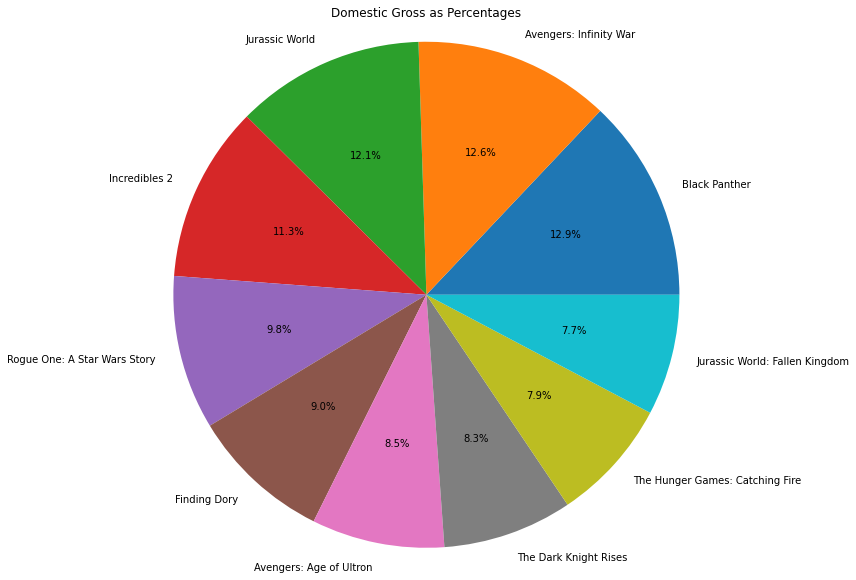

In [62]:
#creating a pie chart for domestic gross as perecentages

# Define the data
title = np.array(['Black Panther', 'Avengers: Infinity War', 'Jurassic World', 'Incredibles 2', 'Rogue One: A Star Wars Story', 'Finding Dory', 'Avengers: Age of Ultron', 'The Dark Knight Rises', 'The Hunger Games: Catching Fire', 'Jurassic World: Fallen Kingdom'])
domestic_gross = np.array([700100000, 678800000, 652300000, 608600000, 532200000, 486300000, 459000000, 448100000, 424700000, 417700000])

# Calculate the percentage of each movie's domestic gross
total_domestic_gross = np.sum(domestic_gross)
percentages = 100 * domestic_gross / total_domestic_gross

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(percentages, labels=title, autopct='%1.1f%%')
ax.axis('equal')  
ax.set_title('Domestic Gross as Percentages')
fig.set_size_inches(10, 10)
plt.show()


#### the pie chart proves that Action|Adventure|Sci-Fi take a big percentage of the Domestic Gross

In [71]:
movie_info = pd.read_excel('/Users/winniemukene/Library/Containers/com.microsoft.Excel/Data/Downloads/newfolder/project-phase-1/zippedData/rt.movie_info.xls')
movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,33886034.0,106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [64]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1560 non-null   int64  
 1   synopsis      1498 non-null   object 
 2   rating        1557 non-null   object 
 3   genre         1552 non-null   object 
 4   director      1361 non-null   object 
 5   writer        1111 non-null   object 
 6   theater_date  1201 non-null   object 
 7   dvd_date      1201 non-null   object 
 8   currency      340 non-null    object 
 9   box_office    340 non-null    float64
 10  runtime       1530 non-null   object 
 11  studio        494 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 146.4+ KB


In [65]:
movie_info.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [73]:
movie_info.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
dtype: int64

In [74]:
#drop null values
movie_info.dropna(inplace=True)

In [75]:
movie_info.isna().sum()

id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
currency        0
box_office      0
runtime         0
dtype: int64

In [76]:
#convert into sql table

movie_info.to_sql('movie_info', conn, if_exists='replace', index=False)

q = """ SELECT * FROM movie_info;"""
pd.read_sql(q, conn)


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime
0,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes
1,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,41032915.0,82 minutes
2,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,224114.0,123 minutes
3,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,134904.0,117 minutes
4,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,1039869.0,108 minutes
...,...,...,...,...,...,...,...,...,...,...,...
253,1975,The year is 1953. A visiting archaeologist cal...,NR,Drama|Romance,Vikramaditya Motwane,Vikramaditya Motwane|Bhavani Iyer|Anurag Kashyap,"Jul 3, 2013","Jan 12, 2015",$,581813.0,142 minutes
254,1976,"Embrace of the Serpent features the encounter,...",NR,Action and Adventure|Art House and International,Ciro Guerra,Ciro Guerra|Jacques Toulemonde Vidal,"Feb 17, 2016","Jun 21, 2016",$,1320005.0,123 minutes
255,1980,A band of renegades on the run in outer space ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,"Sep 30, 2005","Dec 20, 2005",$,25335935.0,119 minutes
256,1981,"Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,"Oct 5, 2012","Nov 20, 2012",$,1416189.0,129 minutes


In [77]:
#getting the runtimes for the top selling genres

r = """SELECT genre, runtime
        FROM movie_info
        WHERE genre LIKE '%action%' OR genre LIKE '%adventure%' OR genre LIKE '%sci-fi%'
            OR genre LIKE '%animation%' OR genre LIKE '%fantasy%'; """
pd.read_sql(r, conn).head(20)

,genre,runtime
0,Drama|Science Fiction and Fantasy,108 minutes
1,Action and Adventure|Drama|Science Fiction and...,127 minutes
2,Action and Adventure|Drama|Horror|Mystery and ...,93 minutes
3,Action and Adventure|Science Fiction and Fantasy,101 minutes
4,Action and Adventure|Drama,124 minutes
5,Action and Adventure|Comedy|Kids and Family,100 minutes
6,Action and Adventure|Drama,97 minutes
7,Art House and International|Drama|Horror|Myste...,118 minutes
8,Action and Adventure|Drama,132 minutes
9,Action and Adventure|Animation|Comedy|Kids and...,91 minutes


#### from the table the average runtime for the top selling genres around (100 minutes - 130 minutes)